# Exploratory Data Analysis: World Bank Indicators
This notebook explores GDP per capita and population data extracted using our ETL pipeline.
The dataset covers multiple countries for the years 2000–2023.



In [1]:
import os
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set project root dynamically
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Connect to DuckDB database
db_path = os.path.join(project_root, "data", "worldbank.duckdb")
conn = duckdb.connect(db_path)

# Load data
df = conn.execute("SELECT * FROM world_bank_indicators").fetchdf()
df.head()


,iso3,year,gdp_per_capita,population
0,Afghanistan,2000,174.930991,20130327.0
1,Afghanistan,2001,138.706822,20284307.0
2,Afghanistan,2002,178.954088,21378117.0
3,Afghanistan,2003,198.871116,22733049.0
4,Afghanistan,2004,221.763654,23560654.0


## Dataset Overview
The dataset contains the following columns:

- `iso3` — Country code  
- `year` — Year of observation  
- `gdp_per_capita` — GDP per capita in USD  
- `population` — Total population

Total rows: **{}** (replace with `len(df)`)


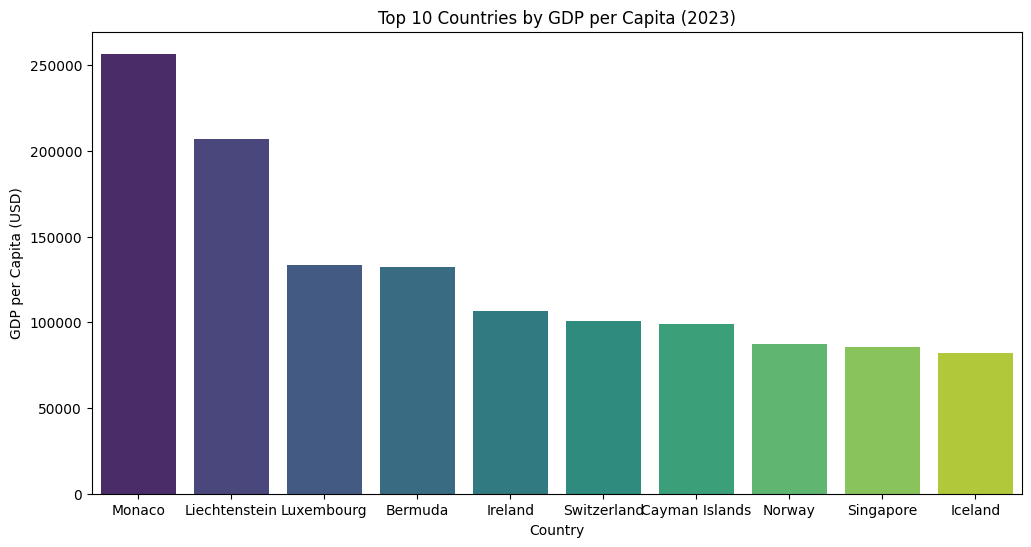

,iso3,gdp_per_capita,population
3959,Monaco,256799.788613,38956.0
3407,Liechtenstein,206780.590353,39846.0
3527,Luxembourg,133230.619179,666430.0
599,Bermuda,132604.439086,64698.0
2783,Ireland,106818.917131,5311538.0
5639,Switzerland,100623.549627,8888822.0
983,Cayman Islands,99143.518024,73038.0
4391,Norway,87497.217965,5519601.0
5087,Singapore,85412.230345,5917648.0
2663,Iceland,82138.789297,385663.0


In [2]:
# Latest year
latest_year = df['year'].max()

top10_gdp = df[df['year'] == latest_year].sort_values('gdp_per_capita', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10_gdp, x='iso3', y='gdp_per_capita',hue='iso3', palette="viridis", dodge=False, 
    legend=False)
plt.title(f"Top 10 Countries by GDP per Capita ({latest_year})")
plt.ylabel("GDP per Capita (USD)")
plt.xlabel("Country")
plt.show()

top10_gdp[['iso3','gdp_per_capita','population']]


### Insight
- Microstates like Monaco and Liechtenstein dominate the GDP per capita ranking.  
- Small populations allow extreme per-capita wealth concentration.  
- Larger economies like Ireland appear in the top 10, showing strong economic performance.


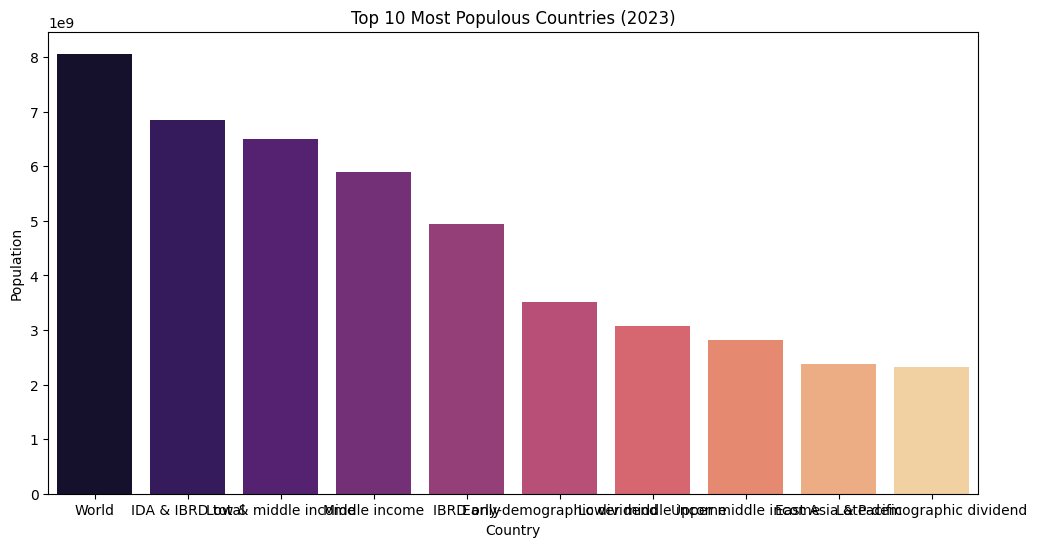

,iso3,population,gdp_per_capita
6287,World,8.064058e+09,13236.716396
2567,IDA & IBRD total,6.858522e+09,6149.505546
3455,Low & middle income,6.498875e+09,5856.294952
3911,Middle income,5.891100e+09,6386.302464
2543,IBRD only,4.952212e+09,7925.399241
1511,Early-demographic dividend,3.511608e+09,4252.597334
3503,Lower middle income,3.082003e+09,2493.389853
6095,Upper middle income,2.809098e+09,10657.968611
1535,East Asia & Pacific,2.384441e+09,13176.178606
3167,Late-demographic dividend,2.326297e+09,12437.986172


In [3]:
top10_pop = df[df['year'] == latest_year].sort_values('population', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_pop, x='iso3', y='population',hue='iso3', palette="magma")
plt.title(f"Top 10 Most Populous Countries ({latest_year})")
plt.ylabel("Population")
plt.xlabel("Country")
plt.show()

top10_pop[['iso3','population','gdp_per_capita']]


### Insight
- China and India are the most populous countries.  
- Population size does not directly correlate with GDP per capita.  
- High GDP per capita is typically seen in smaller countries with concentrated wealth.


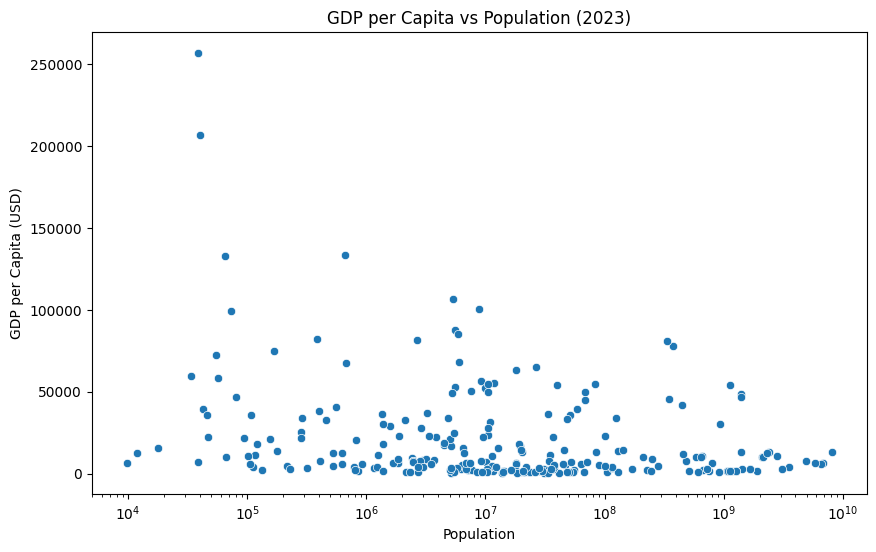

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['year'] == latest_year], x='population', y='gdp_per_capita')
plt.title(f"GDP per Capita vs Population ({latest_year})")
plt.xlabel("Population")
plt.ylabel("GDP per Capita (USD)")
plt.xscale("log")  # optional for better scale
plt.show()


### Insight
- Logarithmic scale shows small countries with tiny populations achieving extremely high GDP per capita.  
- Large populations like India or China have lower GDP per capita despite huge total GDP.  
- This highlights why per capita metrics are important for economic analysis.


In [5]:
country = 'United States'
country_df = df[df['iso3'] == country]

print(country_df[['year', 'gdp_per_capita']])



      year  gdp_per_capita
6048  2000    36329.956073
6049  2001    37133.623113
6050  2002    37997.759657
6051  2003    39490.274956
6052  2004    41724.631629
6053  2005    44123.407068
6054  2006    46302.000880
6055  2007    48050.223777
6056  2008    48570.045980
6057  2009    47194.943355
6058  2010    48642.610018
6059  2011    50024.868799
6060  2012    51708.401156
6061  2013    53179.012763
6062  2014    54973.420752
6063  2015    56572.918900
6064  2016    57638.101837
6065  2017    59635.098440
6066  2018    62499.874439
6067  2019    64746.450678
6068  2020    63515.949181
6069  2021    70205.050916
6070  2022    76657.248884
6071  2023    81032.262118


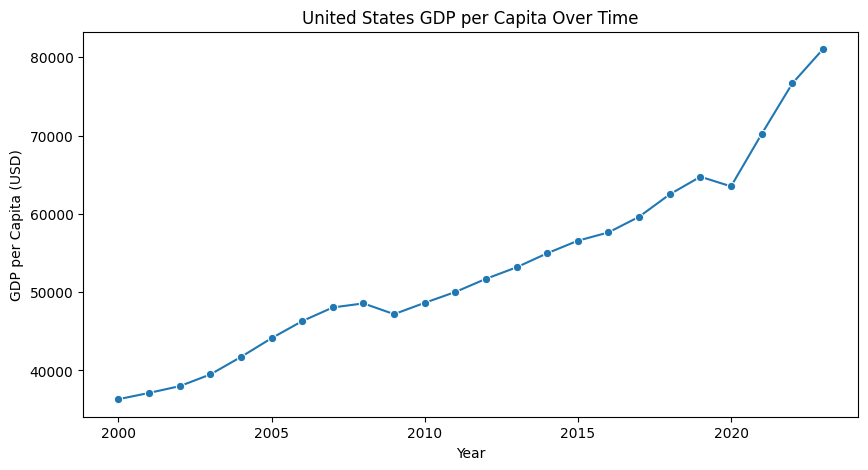

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=country_df, x='year', y='gdp_per_capita', marker='o')
plt.title(f"{country} GDP per Capita Over Time")
plt.ylabel("GDP per Capita (USD)")
plt.xlabel("Year")
plt.show()


### Insight
- Shows economic growth trends over time for a selected country.
- Useful to analyze development progress and compare with other countries.
